## 题目：寻找关键用户和分析社交关系

### data.json 数据描述
#### 1. 用户节点数据包含用户ID和他们的"影响力分数"，格式为["用户名称", 影响力分数]。
#### 2. 边关系数据包含每两个用户之间的连接强度（即边的权重），格式为["用户名称1", "用户名称2", 关系权重]。
例如：
- 节点：["Yanyan-Wang", 50.95], ["Aarebecca", 23.82], ...
- 边：["Yanyan-Wang", "Aarebecca", 25.3], ["Yanyan-Wang", "pomelo-nwu", 25.09], ...

### 问题
#### 1. 社交网络构建与分析
- a. 使用邻接矩阵或者字典表示法来表示这个社交关系网络。
- b. 请找出每个用户的直接朋友（即与其存在边关系的节点），并用列表形式列出。

#### 2. 统计与度中心性分析
- a. 计算每个用户的度数（即直接朋友数量），列出度数最多的前5个用户及其朋友数量。
- b. 通过影响力分数（如上所示），找出影响力最高的前5个用户。
- c. 综合考虑影响力分数和朋友数量，列出对社交网络最有影响力的用户（可以选择将两者按一定比例加权，例如影响力得分的50%和朋友数量的50%）。

#### 3. 推荐新朋友
- a. 对于用户 Yanyan-Wang，请找出其“朋友的朋友”中最有可能成为新朋友的用户，并列出推荐的理由（例如有最多共同的朋友）。
- b. 考虑用户之间的连接强度，找出与 Yanyan-Wang 连接强度最高的5个用户（无论是否已经是直接朋友），并列出推荐排序。
 
#### 4. 网络图的可视化
- a. 使用图论可视化工具绘制用户关系网络图，展示关键用户和他们的连接情况。
- b. 你可以对图中的节点按“影响力得分”进行着色，节点的大小则代表度数，尝试解释在图中哪些用户在社交网络中最具影响力。

前5个朋友最多的用户以及数量:
tyn1998: 30个朋友
frank-zsy: 30个朋友
pomelo-nwu: 24个朋友
andyhuang18: 23个朋友
wj23027: 23个朋友
前5个影响力最大的用户:
Zzzzzhuzhiwei
tyn1998
wxharry
yvonneyx
PureNatural
前5个综合影响力最大的用户:
1 : Yanyan-Wang
2 : pomelo-nwu
3 : tyn1998
4 : frank-zsy
5 : Aarebecca
最有可能和Yanyan-Wang成为朋友的5个:
1 : pomelo-nwu, 拥有13个共同好友
2 : tyn1998, 拥有13个共同好友
3 : yangzy0603, 拥有13个共同好友
4 : frank-zsy, 拥有13个共同好友
5 : Aarebecca, 拥有10个共同好友
与Yanyan_Wang连接强度最高的5个人：
0: Yanyan-Wang
1: Aarebecca
2: pomelo-nwu
3: lidongze0629
4: Maple0817


C:\Users\Frank\AppData\Local\Temp\ipykernel_20516\1360105191.py:81: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(plt.cm.ScalarMappable(cmap=plt.cm.viridis), label='Influence Score')  # 添加颜色条


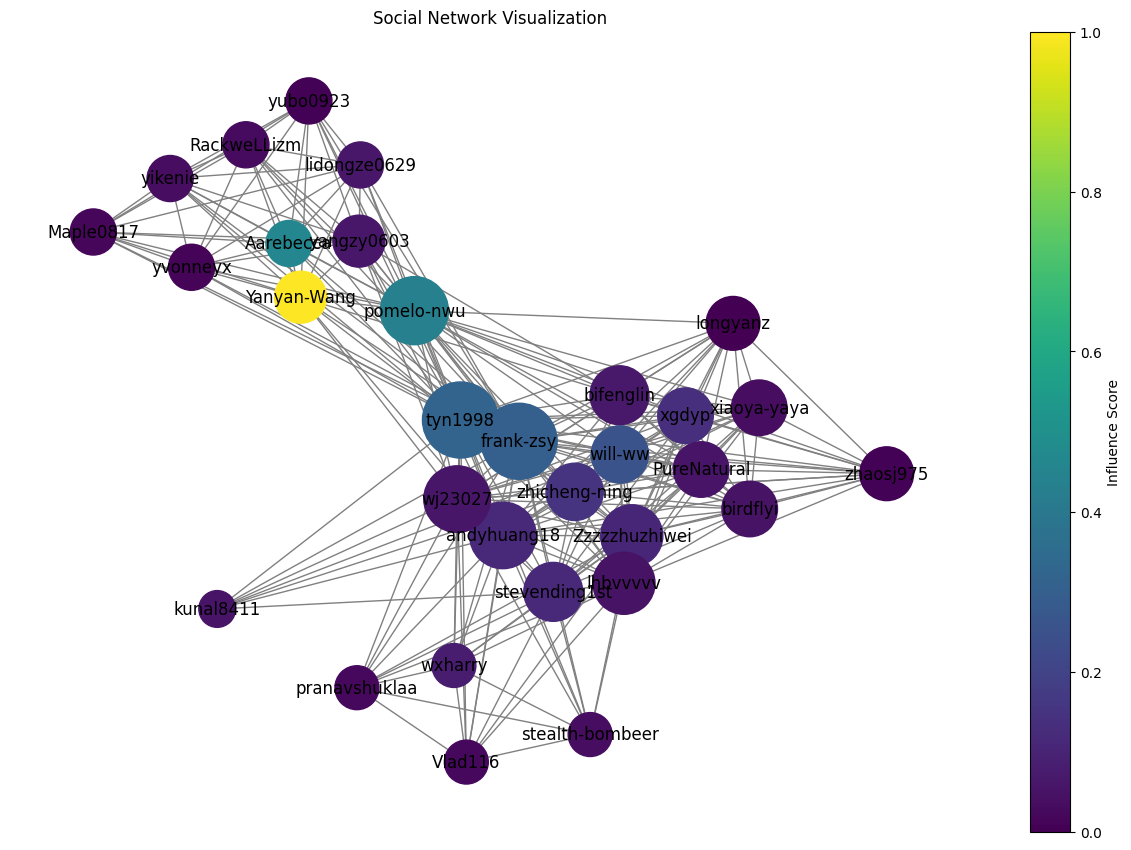

In [6]:
import json
with open(r'D:\AA_Frank\Program\ECNU\dase_introduction\HW_for_dase_2024\data\hw4_data.json','r',encoding='utf-8') as file:
    data = json.load(file)
nodes = data["nodes"]
edges = data["edges"]
user_dict = {node[0]:node[1] for node in nodes}
network = {}
for relation in edges:
    user1, user2 = relation[0], relation[1]
    if user1 not in network:
        network[user1] = []
    if user2 not in network:
        network[user2] = []
    network[user1].append(user2)
    network[user2].append(user1)
friendsNum = {user : len(friends) for user, friends in network.items()}
sorted_user = sorted(friendsNum.items(), key = lambda item: item[1], reverse=True)
top_5_users = sorted_user[:5]
print("前5个朋友最多的用户以及数量:")
for user, num in top_5_users:
    print(f"{user}: {num}个朋友")
influentialUser = sorted(user_dict, key = lambda item: item[1], reverse= True)
top_5_influential_user = influentialUser[:5]
print("前5个影响力最大的用户:")
for user in top_5_influential_user:
    print(f"{user}")
comprehensive_score = {user : 0.5 * friends +  user_dict[user]  for user, friends in friendsNum.items()}
sorted_comprehensive_score = sorted(comprehensive_score.items(), key = lambda item:item[1],reverse=True)
print("前5个综合影响力最大的用户:")
for i in range(5):
    print(f"{i+1} : {sorted_comprehensive_score[i][0]}")

commonFriend = {}
for user, friends in network.items():
    if user != "Yanyan-Wang":
        commonFriendNum = 0
        for friend in friends:
            if friend in network["Yanyan-Wang"]:
                commonFriendNum += 1;
        commonFriend[user] = commonFriendNum
sorted_commonFriend = sorted(commonFriend.items(), key = lambda item:item[1], reverse= True)
print("最有可能和Yanyan-Wang成为朋友的5个:")
for i in range(5):
    print(f"{i+1} : {sorted_commonFriend[i][0]}, 拥有{sorted_commonFriend[i][1]}个共同好友")

connection_strength = {}
for relation in edges:
    user1, user2, weight = relation
    if user2 == "Yanyan-Wang" or user1 == "Yanyan-Wang":
        other_user = user1 if user2 == "Yanyan_Wang" else user2
        if other_user in connection_strength:
            connection_strength[other_user] += weight
        else:
            connection_strength[other_user] = weight
sorted_connection_strength = sorted(connection_strength.items(), key = lambda item:item[1],reverse=True)
print("与Yanyan_Wang连接强度最高的5个人：")
for i in range(min(5, len(sorted_connection_strength))):
    print(f"{i }: {sorted_connection_strength[i][0]}")


import networkx as nx
import matplotlib.pyplot as plt

# 创建网络
network = nx.Graph()
for relation in edges:
    user1, user2, weight = relation
    network.add_edge(user1, user2, weight=weight)

# 计算节点度数和影响力得分
degrees = dict(network.degree())
influence_scores = user_dict
# 节点的大小和颜色
node_sizes = [degrees[node] * 100 for node in network.nodes()]  # 调整乘数以改变节点大小
node_colors = [influence_scores[node] for node in network.nodes()]

# 绘图
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(network)  # 计算节点布局
nx.draw(network, pos, with_labels=True, node_size=node_sizes, node_color=node_colors, cmap=plt.cm.viridis, edge_color='gray')
plt.colorbar(plt.cm.ScalarMappable(cmap=plt.cm.viridis), label='Influence Score')  # 添加颜色条
plt.title("Social Network Visualization")
plt.show()